In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

# Exploratory Data Analysis - EDA

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.shape

(10886, 12)

In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
print("Holiday: ",  df['holiday'].sum())
print("Workingday: ",  df['workingday'].sum())

Holiday:  311
Workingday:  7412


In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


Let's see what corrolations there are between columns

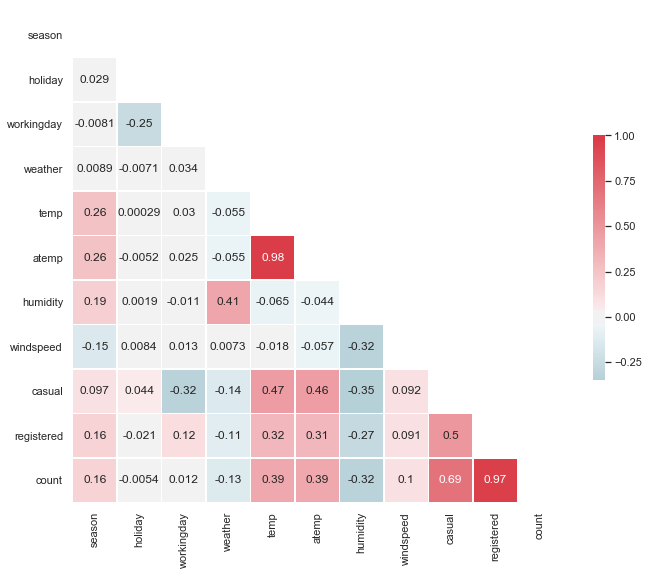

In [10]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

We want to the corrolation between each factor and the count column mainly

casual + registered users = count

temp and season have an interesting impact on count

more registered users on working days

more casual users on holidays

###### Let's create some visualizations

First we break down the datetime column

In [11]:
# count is what we want to know the exact corrolations for
#humidity + working day/holiday/weather seems to have little impact on count
# casual + registered users = count
# temp and season have an interesting impact on count
# more registered users on working days
# more casual users on holidays

In [12]:
def SplitDateTime(df):
    df['date'] = df['datetime'].apply(lambda x: x.split()[0])
    df['hour'] = df['datetime'].apply(lambda x: x.split()[1]).apply(lambda x: x.split(':')[0])
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df.drop(columns='datetime', inplace=True)
    return

In [13]:
SplitDateTime(df)

In [14]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04


D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


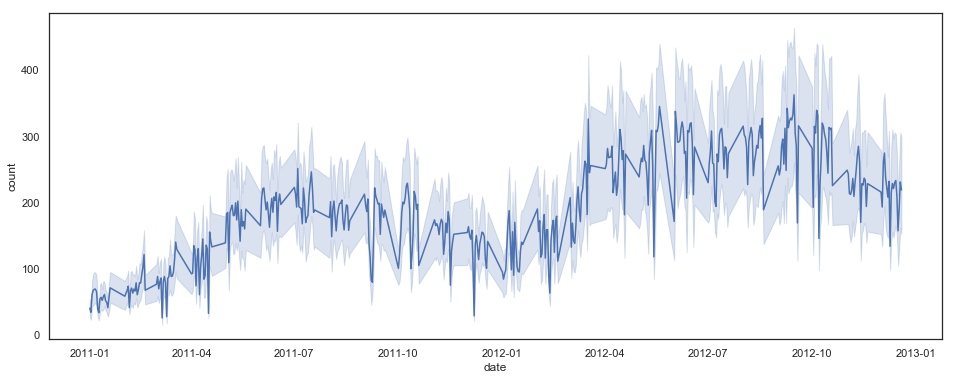

In [15]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['date'], y=df['count'],
             data=df)

The data was recorded over 2 years. Looks like 2nd year had more clients

And that there were more clients over Summer / Autumn

In [16]:
df['month'] = df['date'].dt.strftime("%m")
df['year'] = df['date'].dt.strftime("%Y")
df['month year'] = df['date'].dt.strftime("%m-%Y")

In [17]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,year,month year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,01,2011,01-2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,01,2011,01-2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,01,2011,01-2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,01,2011,01-2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,01,2011,01-2011


SplitMonthYear(df)

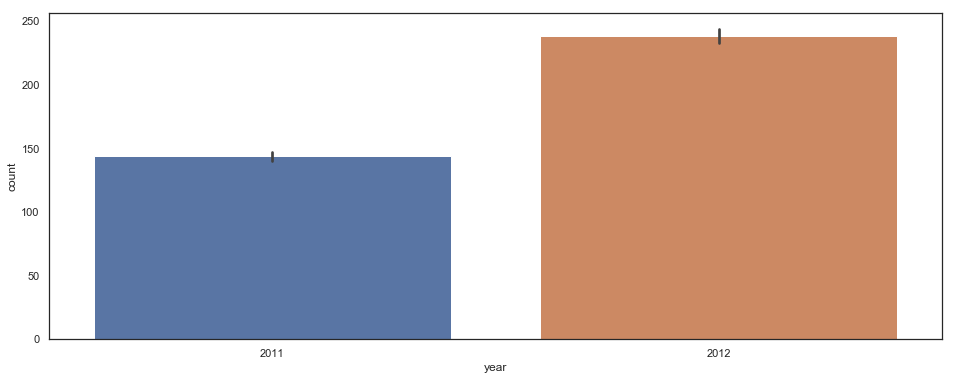

In [18]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['year'], y=df['count'],
             data=df)

2012 had more users

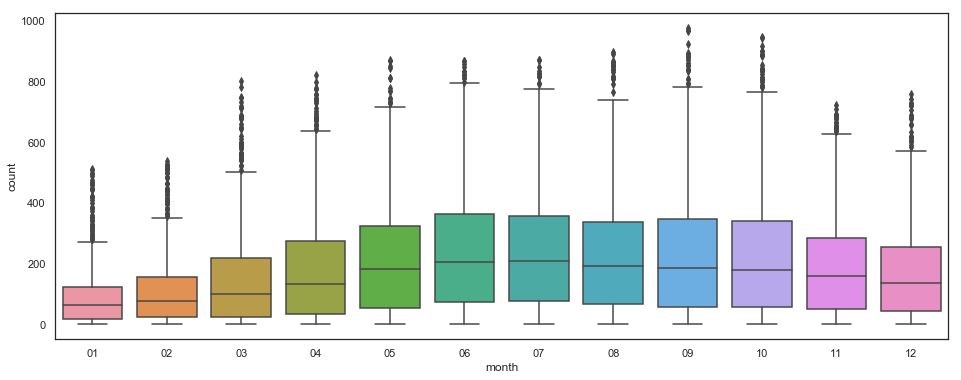

In [22]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['month'], y=df['count'],
             data=df)

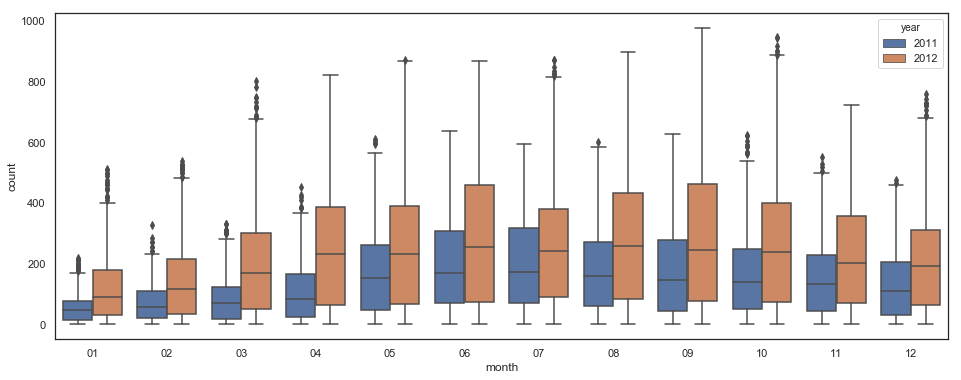

In [21]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['month'], y=df['count'],
             data=df, hue='year')

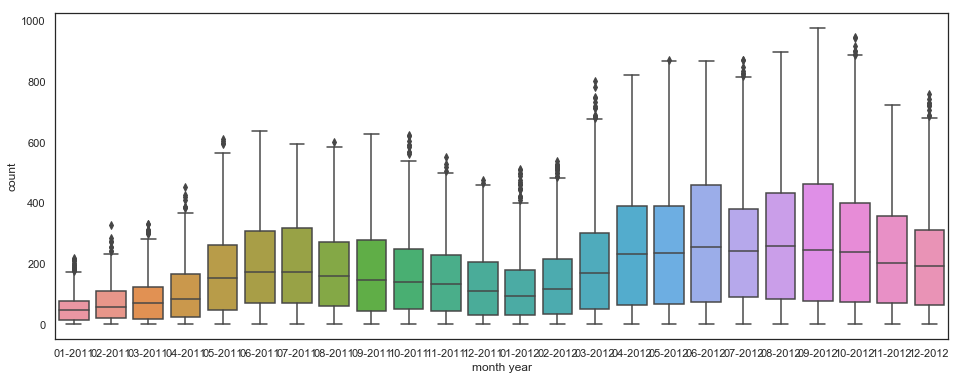

In [20]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['month year'], y=df['count'],
             data=df)

In [24]:
#a lot of outliers each month

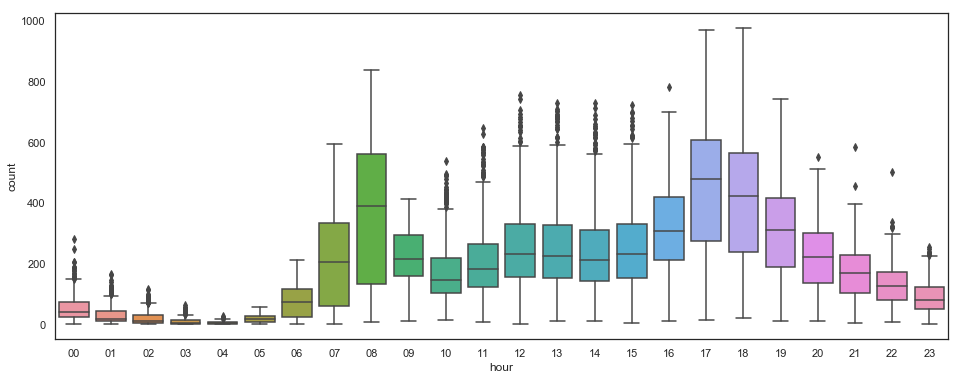

In [25]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['hour'], y=df['count'],
             data=df)

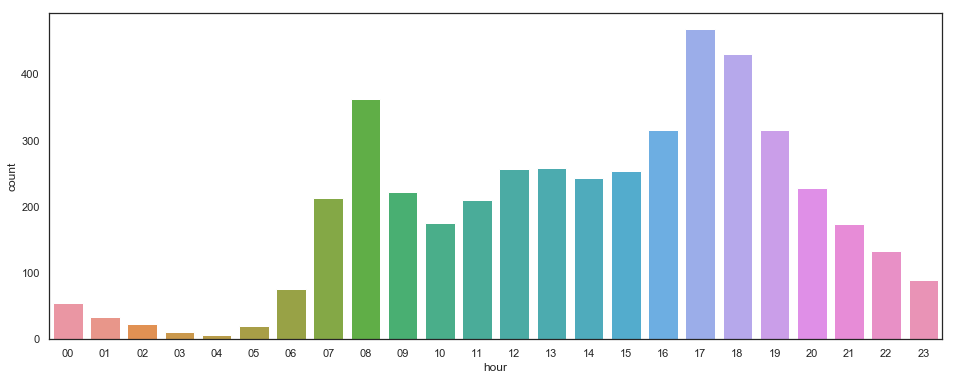

In [23]:
plt.figure(figsize=(16, 6))
dfhour = pd.DataFrame(df.groupby("hour")["count"].mean()).reset_index()
sns.barplot(x="hour", y="count",
           data=dfhour)

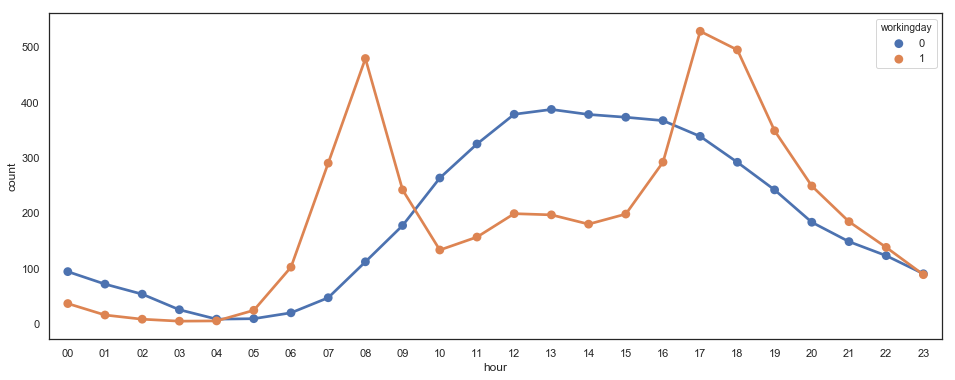

In [24]:
plt.figure(figsize=(16, 6))

dfhour = pd.DataFrame(df.groupby(["hour", "workingday"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=dfhour["hour"], y=dfhour["count"],hue=dfhour["workingday"], data=dfhour)

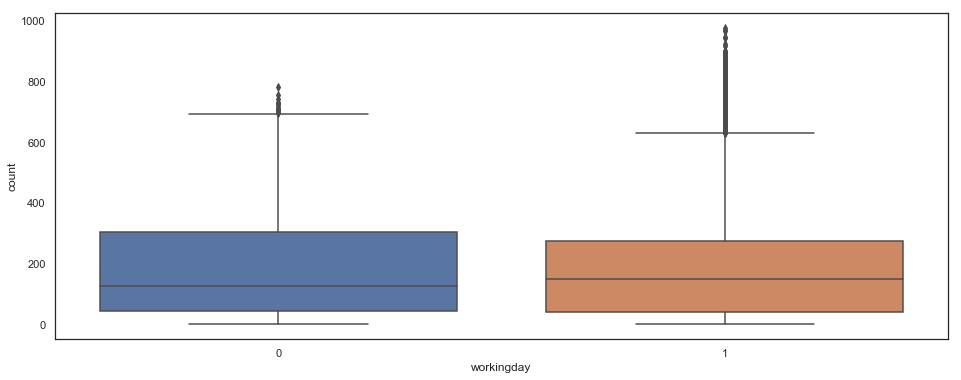

In [26]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['workingday'], y=df['count'],
             data=df)

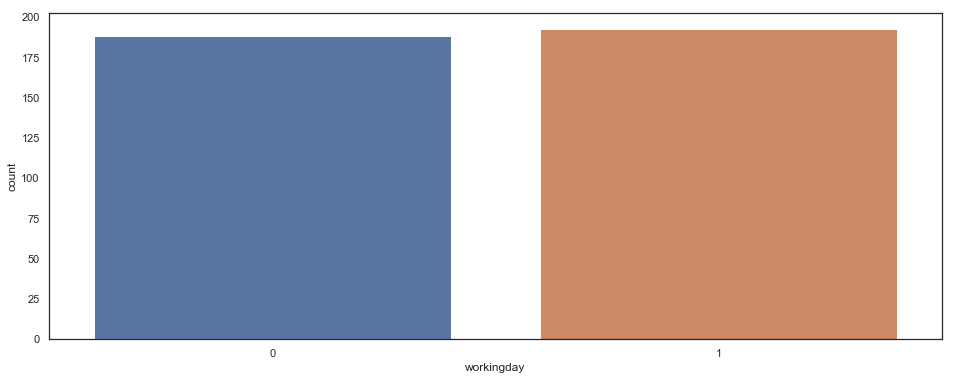

In [25]:
plt.figure(figsize=(16, 6))
dfworking = pd.DataFrame(df.groupby("workingday")["count"].mean()).reset_index()
sns.barplot(x="workingday", y="count",
           data=dfworking)

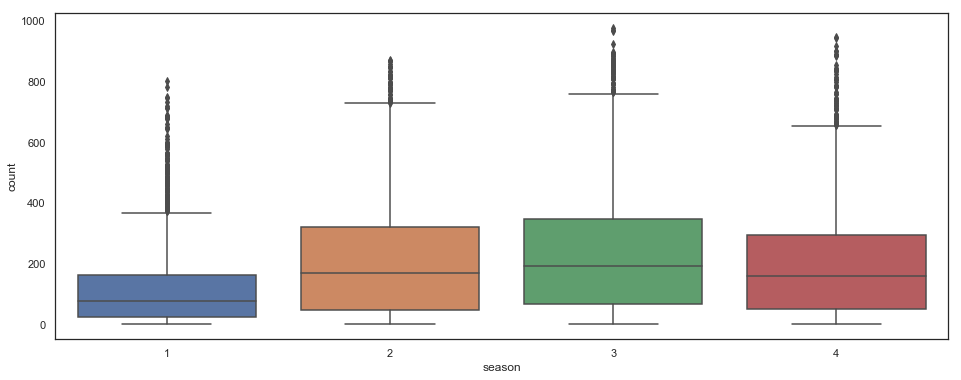

In [27]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['season'], y=df['count'],
             data=df)

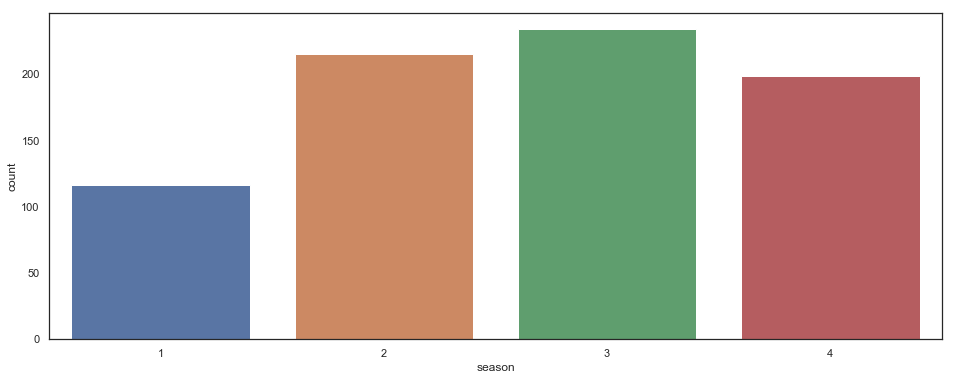

In [26]:
plt.figure(figsize=(16, 6))
dfseason = pd.DataFrame(df.groupby("season")["count"].mean()).reset_index()
sns.barplot(x="season", y="count",
           data=dfseason)



Looks like most users over the summer months, but huge outliers over winter


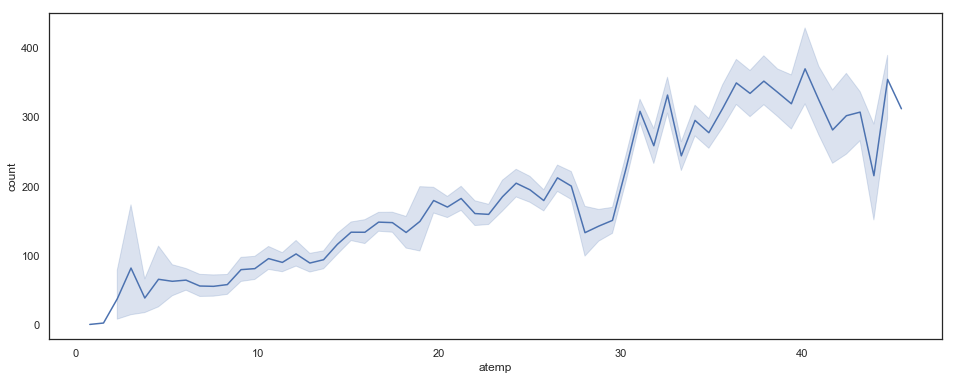

In [28]:
plt.figure(figsize=(16, 6))

sns.lineplot(x=df['atemp'], y=df['count'],
             data=df)

In [ ]:
"""variablelist = ["hour", "month", "season", "weather", "holiday", "workingday"]
for var in variablelist:
    df[var] = df[var].astype("category")"""

In [29]:
df.dtypes

season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
date          datetime64[ns]
hour                  object
month                 object
year                  object
month year            object
dtype: object

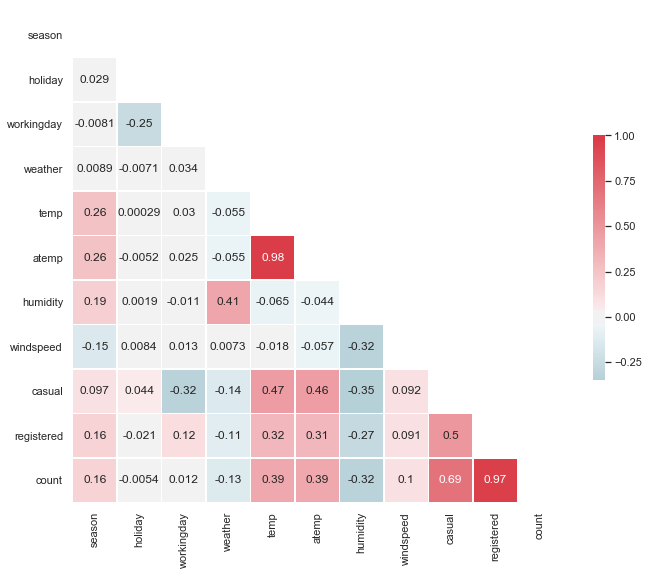

In [31]:
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

* Average users by time of day

* Average users by time of day by type of user, casual vs registered

* Average users by time of day, working day vs non